In [ ]:
%matplotlib notebook

In [91]:
# Dependencies
import requests
from pprint import pprint
from config import vic_key
import json
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

url = "https://api.vic.gov.au:443/abs/v1.0/labour-force-statistics?"

In [2]:
# Search for articles that mention granola
region = "AUSTRALIA"
data_item = "UNEMPLOYMENT_RATE"
age = "15_AND_OVER"
start_period = "2018-01"
end_period = "2020-12"
apikey = vic_key
print(apikey)

be4ce3f1-b187-4693-b1e7-fc68f964b37a


In [3]:
headers = {
  "Content-Type": "application/json",
  "Accept": "application/json",
  "apikey": vic_key
}

In [4]:
# Build query URL
query_url = url + "region=" + region + "&data_item=" + data_item + "&age=" + age + "&start_period=" + start_period + "&end_period=" + end_period

In [5]:
print(query_url)

https://api.vic.gov.au:443/abs/v1.0/labour-force-statistics?region=AUSTRALIA&data_item=UNEMPLOYMENT_RATE&age=15_AND_OVER&start_period=2018-01&end_period=2020-12


In [6]:
# Request data
response = requests.get(query_url, headers = headers)
# Converting the response to JSON, and printing the result.
data = response.json()
pprint(data)

{'_links': [{'href': '/abs/v1.0/labour-force-statistics?age=15_AND_OVER&data_item=UNEMPLOYMENT_RATE&end_period=2020-12&region=AUSTRALIA&start_period=2018-01&page=1&limit=1000',
             'rel': 'self'},
            {'href': '/abs/v1.0/labour-force-statistics?age=15_AND_OVER&data_item=UNEMPLOYMENT_RATE&end_period=2020-12&region=AUSTRALIA&start_period=2018-01&page=1&limit=1000',
             'rel': 'first'},
            {'href': '/abs/v1.0/labour-force-statistics?age=15_AND_OVER&data_item=UNEMPLOYMENT_RATE&end_period=2020-12&region=AUSTRALIA&start_period=2018-01&page=1&limit=1000',
             'rel': 'last'}],
 '_meta': {'count': 324,
           'limit': 1000,
           'page': 1,
           'response_time': '0.383 seconds',
           'response_time_ms': 383,
           'total_records': 324},
 'labour_force_statistics': [{'adjustment_type_description': 'Original',
                              'age_description': '15 and over',
                              'data_item_description': 

                              'observation_value': '5.1517547',
                              'region_description': 'Australia',
                              'sex_description': 'Females'},
                             {'adjustment_type_description': 'Original',
                              'age_description': '15 and over',
                              'data_item_description': 'Unemployment rate (%)',
                              'observation_month': '2019-07',
                              'observation_value': '5.1298299',
                              'region_description': 'Australia',
                              'sex_description': 'Females'},
                             {'adjustment_type_description': 'Original',
                              'age_description': '15 and over',
                              'data_item_description': 'Unemployment rate (%)',
                              'observation_month': '2019-08',
                              'observation_value': '5.1497462'

                             {'adjustment_type_description': 'Original',
                              'age_description': '15 and over',
                              'data_item_description': 'Unemployment rate (%)',
                              'observation_month': '2018-06',
                              'observation_value': '5.173573',
                              'region_description': 'Australia',
                              'sex_description': 'Persons'},
                             {'adjustment_type_description': 'Original',
                              'age_description': '15 and over',
                              'data_item_description': 'Unemployment rate (%)',
                              'observation_month': '2018-07',
                              'observation_value': '5.2009538',
                              'region_description': 'Australia',
                              'sex_description': 'Persons'},
                             {'adjustment_type_description': 'O

                              'region_description': 'Australia',
                              'sex_description': 'Persons'},
                             {'adjustment_type_description': 'Seasonally '
                                                             'Adjusted',
                              'age_description': '15 and over',
                              'data_item_description': 'Unemployment rate (%)',
                              'observation_month': '2019-07',
                              'observation_value': '5.2455233',
                              'region_description': 'Australia',
                              'sex_description': 'Persons'},
                             {'adjustment_type_description': 'Seasonally '
                                                             'Adjusted',
                              'age_description': '15 and over',
                              'data_item_description': 'Unemployment rate (%)',
                              'observa

In [7]:
data_au = data["labour_force_statistics"]

In [8]:
unemploy_au = pd.DataFrame(data_au)
unemploy_au.head()

,region_description,data_item_description,sex_description,age_description,adjustment_type_description,observation_month,observation_value
0,Australia,Unemployment rate (%),Males,15 and over,Original,2018-01,5.8914575
1,Australia,Unemployment rate (%),Males,15 and over,Original,2018-02,5.8682949
2,Australia,Unemployment rate (%),Males,15 and over,Original,2018-03,5.7280693
3,Australia,Unemployment rate (%),Males,15 and over,Original,2018-04,5.5032532
4,Australia,Unemployment rate (%),Males,15 and over,Original,2018-05,5.2036866


In [9]:
clean_unemploy_au=unemploy_au[unemploy_au["observation_value"] != "NaN"]
clean_unemploy_au

,region_description,data_item_description,sex_description,age_description,adjustment_type_description,observation_month,observation_value
0,Australia,Unemployment rate (%),Males,15 and over,Original,2018-01,5.8914575
1,Australia,Unemployment rate (%),Males,15 and over,Original,2018-02,5.8682949
2,Australia,Unemployment rate (%),Males,15 and over,Original,2018-03,5.7280693
3,Australia,Unemployment rate (%),Males,15 and over,Original,2018-04,5.5032532
4,Australia,Unemployment rate (%),Males,15 and over,Original,2018-05,5.2036866
...,...,...,...,...,...,...,...
283,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2020-08,6.8046981
284,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2020-09,6.9095718
285,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2020-10,6.9803063
286,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2020-11,6.817515


In [10]:
clean_unemploy_au.dtypes

region_description             object
data_item_description          object
sex_description                object
age_description                object
adjustment_type_description    object
observation_month              object
observation_value              object
dtype: object

In [11]:
clean_unemploy_au["observation_value"] = clean_unemploy_au.observation_value.astype(float)

C:\Users\licarm\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
clean_unemploy_au.dtypes

region_description              object
data_item_description           object
sex_description                 object
age_description                 object
adjustment_type_description     object
observation_month               object
observation_value              float64
dtype: object

In [13]:
male_au = clean_unemploy_au.loc[clean_unemploy_au["sex_description"] == "Males"]
male_au_Seasonally_Adjusted = male_au.loc[male_au["adjustment_type_description"] == "Seasonally Adjusted"]
male_au.head(72)

,region_description,data_item_description,sex_description,age_description,adjustment_type_description,observation_month,observation_value
0,Australia,Unemployment rate (%),Males,15 and over,Original,2018-01,5.891457
1,Australia,Unemployment rate (%),Males,15 and over,Original,2018-02,5.868295
2,Australia,Unemployment rate (%),Males,15 and over,Original,2018-03,5.728069
3,Australia,Unemployment rate (%),Males,15 and over,Original,2018-04,5.503253
4,Australia,Unemployment rate (%),Males,15 and over,Original,2018-05,5.203687
...,...,...,...,...,...,...,...
67,Australia,Unemployment rate (%),Males,15 and over,Seasonally Adjusted,2020-08,7.025556
68,Australia,Unemployment rate (%),Males,15 and over,Seasonally Adjusted,2020-09,7.121089
69,Australia,Unemployment rate (%),Males,15 and over,Seasonally Adjusted,2020-10,6.948860
70,Australia,Unemployment rate (%),Males,15 and over,Seasonally Adjusted,2020-11,6.534336


In [14]:
male_au = clean_unemploy_au.loc[clean_unemploy_au["sex_description"] == "Males"]
male_au_Seasonally_Adjusted = male_au.loc[male_au["adjustment_type_description"] == "Seasonally Adjusted"]
male_au_Seasonally_Adjusted

,region_description,data_item_description,sex_description,age_description,adjustment_type_description,observation_month,observation_value
36,Australia,Unemployment rate (%),Males,15 and over,Seasonally Adjusted,2018-01,5.426177
37,Australia,Unemployment rate (%),Males,15 and over,Seasonally Adjusted,2018-02,5.502903
38,Australia,Unemployment rate (%),Males,15 and over,Seasonally Adjusted,2018-03,5.489670
39,Australia,Unemployment rate (%),Males,15 and over,Seasonally Adjusted,2018-04,5.585210
40,Australia,Unemployment rate (%),Males,15 and over,Seasonally Adjusted,2018-05,5.408063
41,Australia,Unemployment rate (%),Males,15 and over,Seasonally Adjusted,2018-06,5.510682
42,Australia,Unemployment rate (%),Males,15 and over,Seasonally Adjusted,2018-07,5.330475
43,Australia,Unemployment rate (%),Males,15 and over,Seasonally Adjusted,2018-08,5.202509
44,Australia,Unemployment rate (%),Males,15 and over,Seasonally Adjusted,2018-09,4.832197
45,Australia,Unemployment rate (%),Males,15 and over,Seasonally Adjusted,2018-10,4.970769


In [ ]:
unemployment_rate_male = male_au_Seasonally_Adjusted.observation_value.astype(float)

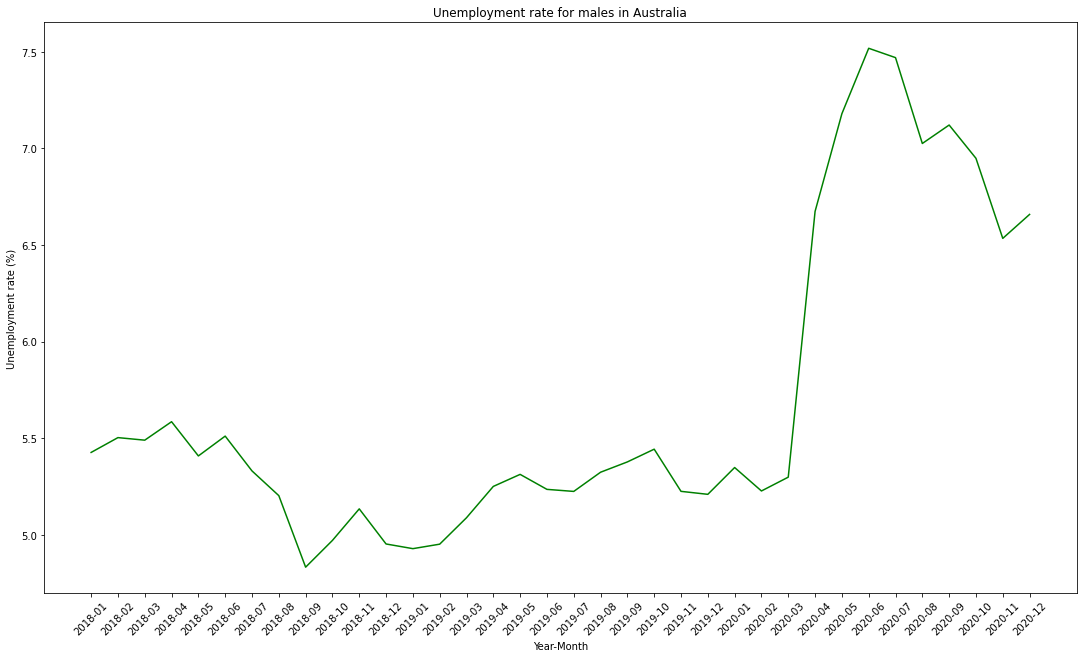

In [99]:
male_rate = plt.plot(male_au_Seasonally_Adjusted["observation_month"], male_au_Seasonally_Adjusted["observation_value"], color="green")
plt.title("Unemployment rate for males in Australia")
plt.xlabel("Year-Month")
plt.ylabel("Unemployment rate (%)")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.xticks(rotation=45)

plt.savefig("Unemployment rate for males in Australia.png")
# 

In [21]:
female_au = clean_unemploy_au.loc[clean_unemploy_au["sex_description"] == "Females"]
female_au_Seasonally_Adjusted = female_au.loc[female_au["adjustment_type_description"] == "Seasonally Adjusted"]
female_au_Seasonally_Adjusted

,region_description,data_item_description,sex_description,age_description,adjustment_type_description,observation_month,observation_value
144,Australia,Unemployment rate (%),Females,15 and over,Seasonally Adjusted,2018-01,5.586053
145,Australia,Unemployment rate (%),Females,15 and over,Seasonally Adjusted,2018-02,5.623097
146,Australia,Unemployment rate (%),Females,15 and over,Seasonally Adjusted,2018-03,5.522525
147,Australia,Unemployment rate (%),Females,15 and over,Seasonally Adjusted,2018-04,5.476617
148,Australia,Unemployment rate (%),Females,15 and over,Seasonally Adjusted,2018-05,5.404611
149,Australia,Unemployment rate (%),Females,15 and over,Seasonally Adjusted,2018-06,5.101829
150,Australia,Unemployment rate (%),Females,15 and over,Seasonally Adjusted,2018-07,5.213871
151,Australia,Unemployment rate (%),Females,15 and over,Seasonally Adjusted,2018-08,5.319076
152,Australia,Unemployment rate (%),Females,15 and over,Seasonally Adjusted,2018-09,5.222907
153,Australia,Unemployment rate (%),Females,15 and over,Seasonally Adjusted,2018-10,5.038788


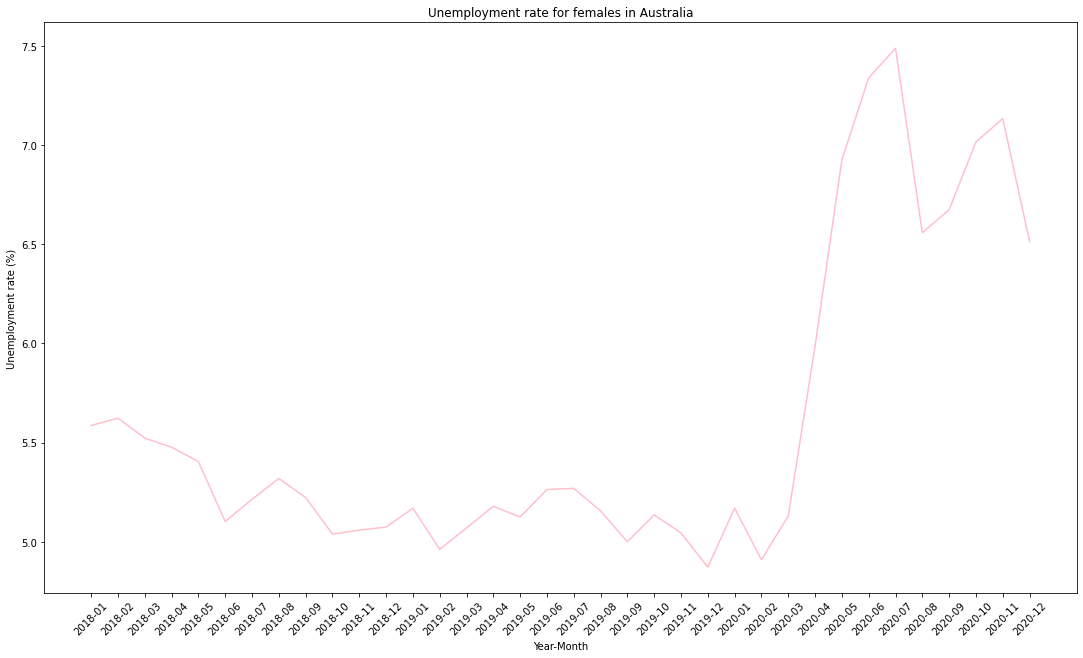

In [22]:
#unemployment_rate_female = female_au_Seasonally_Adjusted.observation_value.astype(float)

female_rate = plt.plot(female_au_Seasonally_Adjusted["observation_month"], female_au_Seasonally_Adjusted["observation_value"], color="pink")
plt.title("Unemployment rate for females in Australia")
plt.xlabel("Year-Month")
plt.ylabel("Unemployment rate (%)")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.xticks(rotation=45)


plt.show()

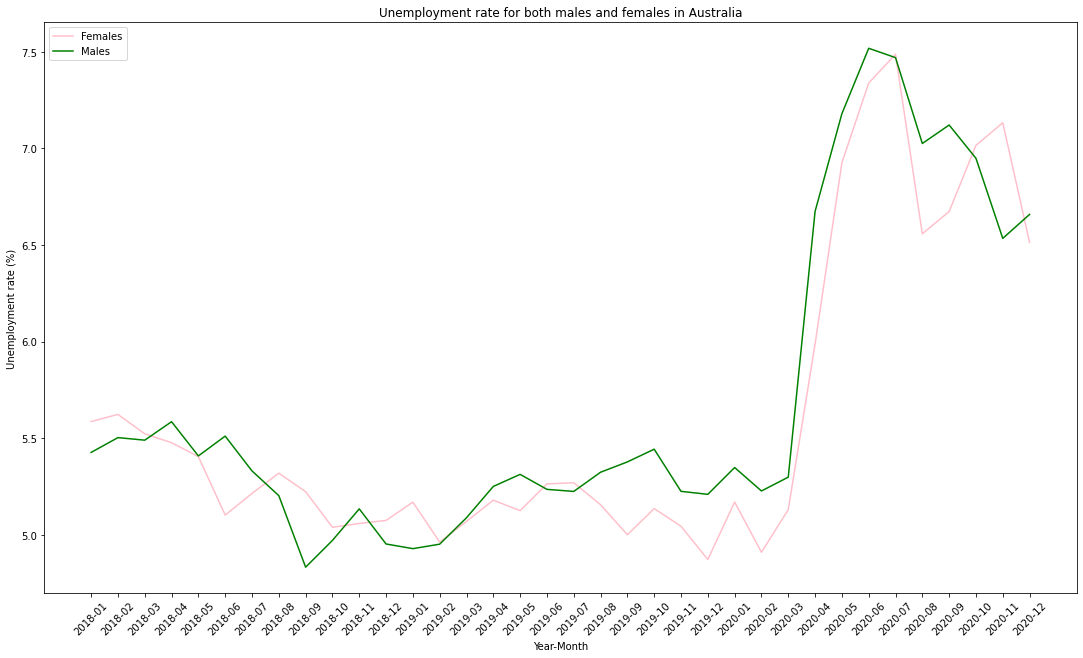

In [100]:

plt.plot(female_au_Seasonally_Adjusted ["observation_month"], female_au_Seasonally_Adjusted["observation_value"],color="pink", label="Females")

plt.plot(male_au_Seasonally_Adjusted["observation_month"], male_au_Seasonally_Adjusted["observation_value"],color="green", label="Males")

plt.title("Unemployment rate for both males and females in Australia")
plt.xlabel("Year-Month")
plt.ylabel("Unemployment rate (%)")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.xticks(rotation=45)

plt.legend(loc="upper left")



#plt.legend(handles=[Females, Males], loc="best")
#plt.legend(loc="lower right")

plt.savefig("Unemployment rate for both genders in Australia.png")

In [92]:
stats.ttest_1samp(female_au_Seasonally_Adjusted["observation_value"], male_au_Seasonally_Adjusted["observation_value"].mean())

Ttest_1sampResult(statistic=-0.681316864664988, pvalue=0.5001544815518069)

In [25]:
# Search for articles that mention granola
region = "AUSTRALIA"
data_item = "UNEMPLOYED_PERSONS"
age = "15_AND_OVER"
start_period = "2018-01"
end_period = "2020-12"
apikey = vic_key
print(apikey)

be4ce3f1-b187-4693-b1e7-fc68f964b37a


In [26]:
headers = {
  "Content-Type": "application/json",
  "Accept": "application/json",
  "apikey": vic_key
}

In [27]:
# Build query URL
query_url = url + "region=" + region + "&data_item=" + data_item + "&age=" + age + "&start_period=" + start_period + "&end_period=" + end_period

In [28]:
# Request data
response2 = requests.get(query_url, headers = headers)
# Converting the response to JSON, and printing the result.
data2 = response2.json()
pprint(data2)

{'_links': [{'href': '/abs/v1.0/labour-force-statistics?age=15_AND_OVER&data_item=UNEMPLOYED_PERSONS&end_period=2020-12&region=AUSTRALIA&start_period=2018-01&page=1&limit=1000',
             'rel': 'self'},
            {'href': '/abs/v1.0/labour-force-statistics?age=15_AND_OVER&data_item=UNEMPLOYED_PERSONS&end_period=2020-12&region=AUSTRALIA&start_period=2018-01&page=1&limit=1000',
             'rel': 'first'},
            {'href': '/abs/v1.0/labour-force-statistics?age=15_AND_OVER&data_item=UNEMPLOYED_PERSONS&end_period=2020-12&region=AUSTRALIA&start_period=2018-01&page=1&limit=1000',
             'rel': 'last'}],
 '_meta': {'count': 324,
           'limit': 1000,
           'page': 1,
           'response_time': '0.639 seconds',
           'response_time_ms': 639,
           'total_records': 324},
 'labour_force_statistics': [{'adjustment_type_description': 'Original',
                              'age_description': '15 and over',
                              'data_item_description

                             {'adjustment_type_description': 'Original',
                              'age_description': '15 and over',
                              'data_item_description': 'Unemployed persons '
                                                       "('000)",
                              'observation_month': '2020-07',
                              'observation_value': '463.4073686',
                              'region_description': 'Australia',
                              'sex_description': 'Females'},
                             {'adjustment_type_description': 'Original',
                              'age_description': '15 and over',
                              'data_item_description': 'Unemployed persons '
                                                       "('000)",
                              'observation_month': '2020-08',
                              'observation_value': '417.9636114',
                              'region_description': 'Austral

                              'data_item_description': 'Unemployed persons '
                                                       "('000)",
                              'observation_month': '2018-07',
                              'observation_value': '689.9224324',
                              'region_description': 'Australia',
                              'sex_description': 'Persons'},
                             {'adjustment_type_description': 'Original',
                              'age_description': '15 and over',
                              'data_item_description': 'Unemployed persons '
                                                       "('000)",
                              'observation_month': '2018-08',
                              'observation_value': '698.353137',
                              'region_description': 'Australia',
                              'sex_description': 'Persons'},
                             {'adjustment_type_description': 'Original',

                              'observation_value': 'NaN',
                              'region_description': 'Australia',
                              'sex_description': 'Persons'},
                             {'adjustment_type_description': 'Trend',
                              'age_description': '15 and over',
                              'data_item_description': 'Unemployed persons '
                                                       "('000)",
                              'observation_month': '2019-01',
                              'observation_value': 'NaN',
                              'region_description': 'Australia',
                              'sex_description': 'Persons'},
                             {'adjustment_type_description': 'Trend',
                              'age_description': '15 and over',
                              'data_item_description': 'Unemployed persons '
                                                       "('000)",
                  

In [29]:
data_au_2 = data2["labour_force_statistics"]

In [31]:
unemploy_person = pd.DataFrame(data_au_2)
unemploy_person

,region_description,data_item_description,sex_description,age_description,adjustment_type_description,observation_month,observation_value
0,Australia,Unemployed persons ('000),Males,15 and over,Original,2018-01,410.5333443
1,Australia,Unemployed persons ('000),Males,15 and over,Original,2018-02,415.2705834
2,Australia,Unemployed persons ('000),Males,15 and over,Original,2018-03,402.9509611
3,Australia,Unemployed persons ('000),Males,15 and over,Original,2018-04,387.415279
4,Australia,Unemployed persons ('000),Males,15 and over,Original,2018-05,365.8852688
...,...,...,...,...,...,...,...
319,Australia,Unemployed persons ('000),Persons,15 and over,Trend,2020-08,NaN
320,Australia,Unemployed persons ('000),Persons,15 and over,Trend,2020-09,NaN
321,Australia,Unemployed persons ('000),Persons,15 and over,Trend,2020-10,NaN
322,Australia,Unemployed persons ('000),Persons,15 and over,Trend,2020-11,NaN


In [32]:
clean_unemploy_person=unemploy_person[unemploy_person["observation_value"] != "NaN"]
clean_unemploy_person

,region_description,data_item_description,sex_description,age_description,adjustment_type_description,observation_month,observation_value
0,Australia,Unemployed persons ('000),Males,15 and over,Original,2018-01,410.5333443
1,Australia,Unemployed persons ('000),Males,15 and over,Original,2018-02,415.2705834
2,Australia,Unemployed persons ('000),Males,15 and over,Original,2018-03,402.9509611
3,Australia,Unemployed persons ('000),Males,15 and over,Original,2018-04,387.415279
4,Australia,Unemployed persons ('000),Males,15 and over,Original,2018-05,365.8852688
...,...,...,...,...,...,...,...
283,Australia,Unemployed persons ('000),Persons,15 and over,Seasonally Adjusted,2020-08,922.0750686
284,Australia,Unemployed persons ('000),Persons,15 and over,Seasonally Adjusted,2020-09,933.6967951
285,Australia,Unemployed persons ('000),Persons,15 and over,Seasonally Adjusted,2020-10,957.239643
286,Australia,Unemployed persons ('000),Persons,15 and over,Seasonally Adjusted,2020-11,939.5889463


In [33]:
clean_unemploy_person["observation_value"] = clean_unemploy_person.observation_value.astype(float)

C:\Users\licarm\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
clean_unemploy_person.dtypes

region_description              object
data_item_description           object
sex_description                 object
age_description                 object
adjustment_type_description     object
observation_month               object
observation_value              float64
dtype: object

In [36]:
male_count = clean_unemploy_person.loc[clean_unemploy_person["sex_description"] == "Males"]
male_count = male_count.loc[male_count["adjustment_type_description"] == "Seasonally Adjusted"]
male_count

,region_description,data_item_description,sex_description,age_description,adjustment_type_description,observation_month,observation_value
36,Australia,Unemployed persons ('000),Males,15 and over,Seasonally Adjusted,2018-01,381.003175
37,Australia,Unemployed persons ('000),Males,15 and over,Seasonally Adjusted,2018-02,385.785153
38,Australia,Unemployed persons ('000),Males,15 and over,Seasonally Adjusted,2018-03,384.823220
39,Australia,Unemployed persons ('000),Males,15 and over,Seasonally Adjusted,2018-04,392.543226
40,Australia,Unemployed persons ('000),Males,15 and over,Seasonally Adjusted,2018-05,379.181695
41,Australia,Unemployed persons ('000),Males,15 and over,Seasonally Adjusted,2018-06,388.017636
42,Australia,Unemployed persons ('000),Males,15 and over,Seasonally Adjusted,2018-07,375.812007
43,Australia,Unemployed persons ('000),Males,15 and over,Seasonally Adjusted,2018-08,368.128574
44,Australia,Unemployed persons ('000),Males,15 and over,Seasonally Adjusted,2018-09,340.952146
45,Australia,Unemployed persons ('000),Males,15 and over,Seasonally Adjusted,2018-10,351.742937


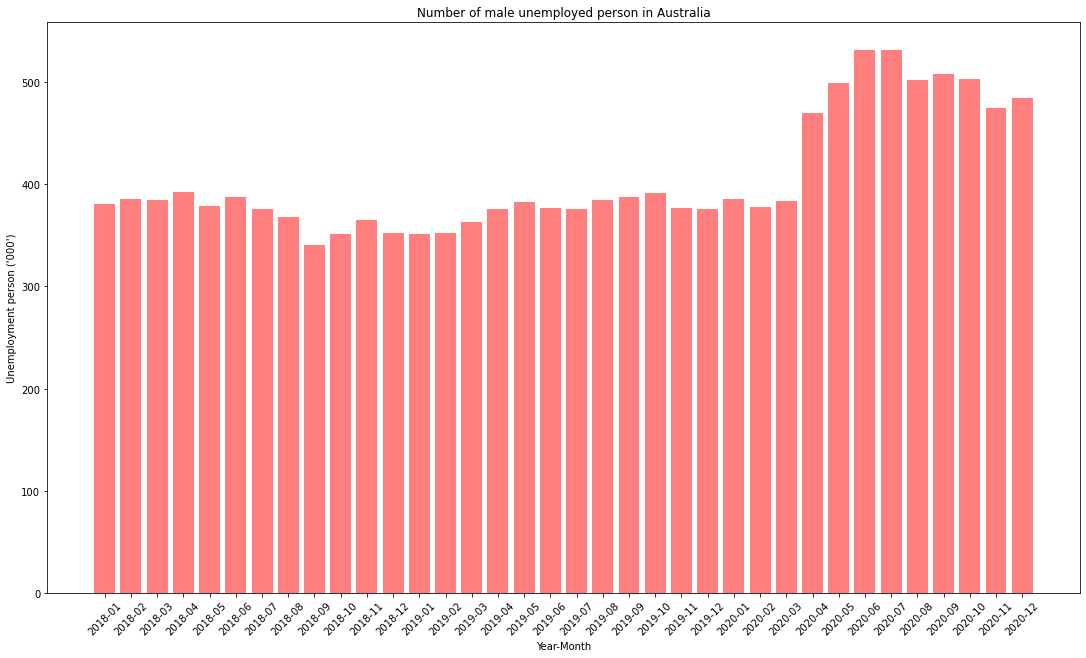

In [37]:

plt.bar(male_count["observation_month"], male_count["observation_value"] , color='r', alpha=0.5, align="center")


#plt.xlim(-0.75, len(x_axis)-0.25)

plt.title("Number of male unemployed person in Australia")
plt.xlabel("Year-Month")
plt.ylabel("Unemployment person ('000')")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.xticks(rotation=45)

plt.show()

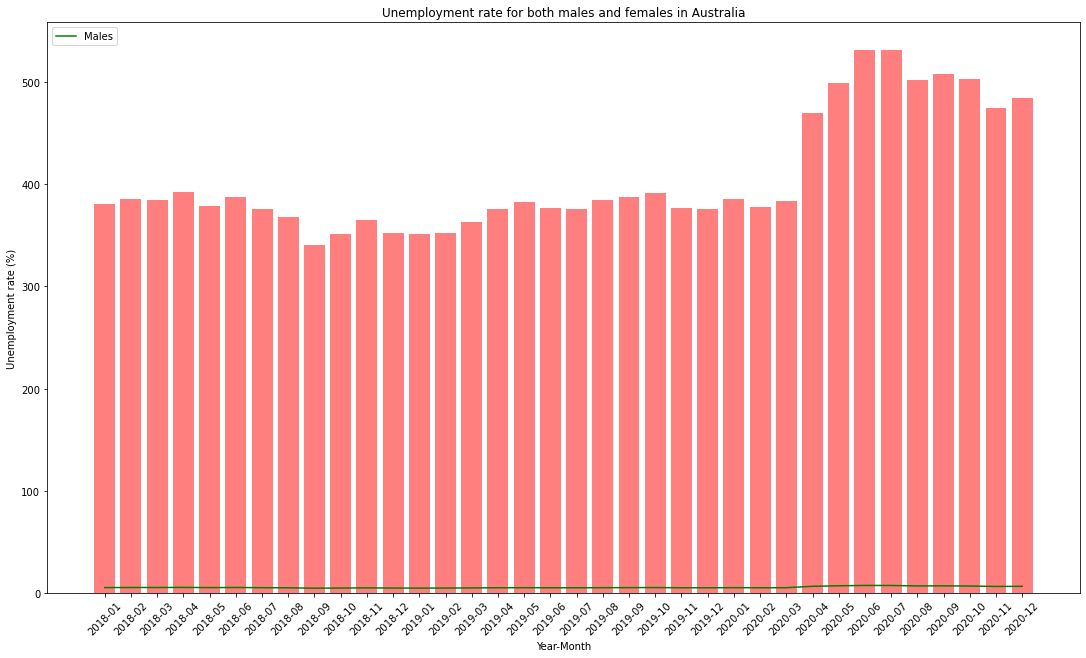

In [42]:

fig, ax = plt.subplots()

plt.bar(male_count["observation_month"], male_count["observation_value"] , color='r', alpha=0.5, align="center")

plt.plot(male_au_Seasonally_Adjusted["observation_month"], male_au_Seasonally_Adjusted["observation_value"],color="green", label="Males")

plt.title("Unemployment rate for both males and females in Australia")
plt.xlabel("Year-Month")
plt.ylabel("Unemployment rate (%)")

#secax = ax.secondary_yaxis('right')
#secax.set_xlabel("Unemployment person ('000')")
#ax.right_ax.set_ylabel("Unemployment person ('000')")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.xticks(rotation=45)

plt.legend(loc="upper left")
#plt.legend(handles=[Females, Males], loc="best")
#plt.legend(loc="lower right")
plt.show()

In [43]:
female_count = clean_unemploy_person.loc[clean_unemploy_person["sex_description"] == "Females"]
female_count = female_count.loc[female_count["adjustment_type_description"] == "Seasonally Adjusted"]
female_count

,region_description,data_item_description,sex_description,age_description,adjustment_type_description,observation_month,observation_value
144,Australia,Unemployed persons ('000),Females,15 and over,Seasonally Adjusted,2018-01,345.792936
145,Australia,Unemployed persons ('000),Females,15 and over,Seasonally Adjusted,2018-02,348.938776
146,Australia,Unemployed persons ('000),Females,15 and over,Seasonally Adjusted,2018-03,342.989378
147,Australia,Unemployed persons ('000),Females,15 and over,Seasonally Adjusted,2018-04,340.127613
148,Australia,Unemployed persons ('000),Females,15 and over,Seasonally Adjusted,2018-05,335.605758
149,Australia,Unemployed persons ('000),Females,15 and over,Seasonally Adjusted,2018-06,318.378164
150,Australia,Unemployed persons ('000),Females,15 and over,Seasonally Adjusted,2018-07,324.372270
151,Australia,Unemployed persons ('000),Females,15 and over,Seasonally Adjusted,2018-08,331.930239
152,Australia,Unemployed persons ('000),Females,15 and over,Seasonally Adjusted,2018-09,325.790738
153,Australia,Unemployed persons ('000),Females,15 and over,Seasonally Adjusted,2018-10,315.255066


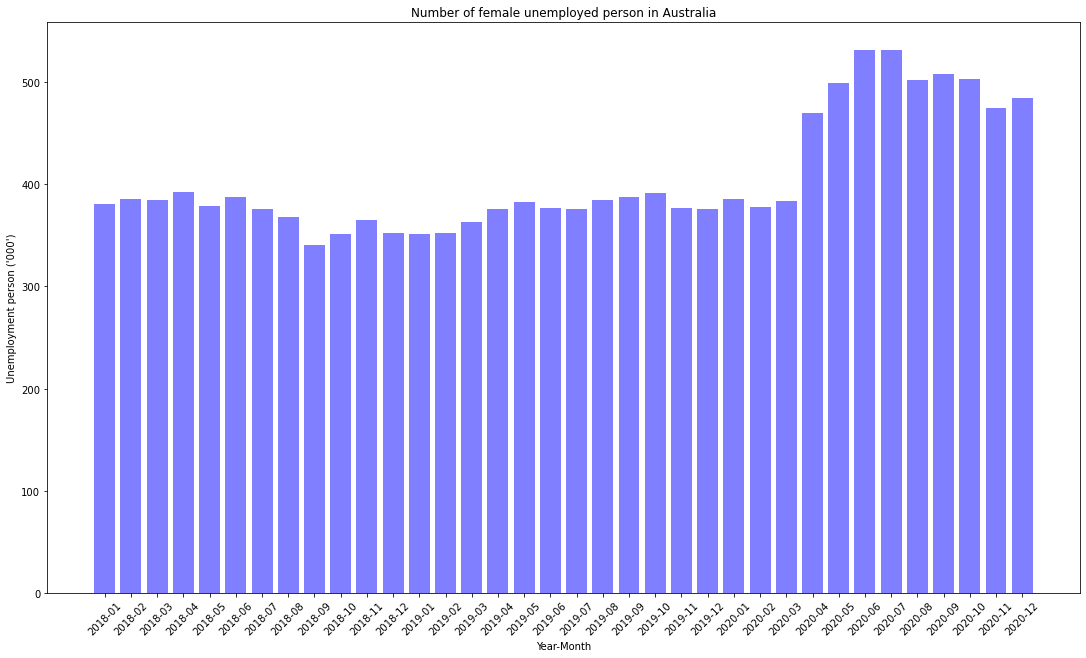

In [44]:
plt.bar(female_count["observation_month"], male_count["observation_value"] , color='b', alpha=0.5, align="center")


#plt.xlim(-0.75, len(x_axis)-0.25)

plt.title("Number of female unemployed person in Australia")
plt.xlabel("Year-Month")
plt.ylabel("Unemployment person ('000')")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.xticks(rotation=45)

plt.show()

In [ ]:
2020-03    2020-07

In [57]:
male_count_lowest = male_count.loc[male_count["observation_month"] == "2020-03"]
male_count_lowest

,region_description,data_item_description,sex_description,age_description,adjustment_type_description,observation_month,observation_value
62,Australia,Unemployed persons ('000),Males,15 and over,Seasonally Adjusted,2020-03,383.157532


In [101]:
male_count_highest = male_count.loc[male_count["observation_month"] == "2020-08"]
male_count_highest

,region_description,data_item_description,sex_description,age_description,adjustment_type_description,observation_month,observation_value
67,Australia,Unemployed persons ('000),Males,15 and over,Seasonally Adjusted,2020-08,502.386167


In [58]:
percentage_change = (531.827852 - 383.157532)/383.157532*100
percentage_change

38.80135651359191

In [62]:
print(male_count_highest["observation_value"].item())

531.8278521


In [ ]:
male_count_highest = male_count_highest["observation_value"].item()
male_count_lowest = male_count_lowest["observation_value"].item()


In [70]:
female_count_lowest=female_count.loc[female_count["observation_month"] == "2020-03"]
#female_count_lowest=female_count_lowest.item()
female_count_lowest

,region_description,data_item_description,sex_description,age_description,adjustment_type_description,observation_month,observation_value
170,Australia,Unemployed persons ('000),Females,15 and over,Seasonally Adjusted,2020-03,332.81765


In [103]:

female_count_highest = female_count.loc[female_count["observation_month"] == "2020-08"]
female_count_highest

,region_description,data_item_description,sex_description,age_description,adjustment_type_description,observation_month,observation_value
175,Australia,Unemployed persons ('000),Females,15 and over,Seasonally Adjusted,2020-08,419.688902


In [104]:
pies = ["Females", "Males"]
pie_highest = [419.688902, 502.386167]
colors = ["orange", "lightblue"]
explode = (0.1, 0)



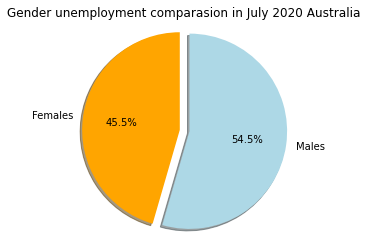

In [105]:
plt.pie(pie_highest, explode=explode, labels=pies,colors=colors, autopct="%1.1f%%", shadow = True, startangle=90)
plt.axis("equal")



plt.title("Gender unemployment comparasion in July 2020 Australia")


fig = plt.gcf()
#fig.set_size_inches(18.5, 10.5)

plt.xticks(rotation=45)

plt.show()

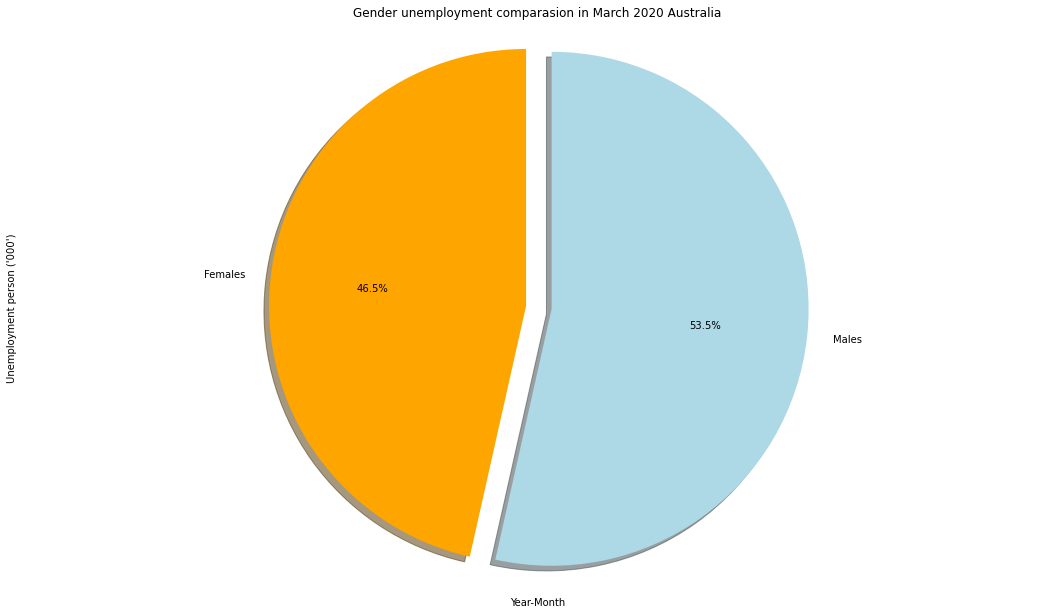

In [90]:
pies = ["Females", "Males"]
pie_lowest = [332.81765, 383.157532]
colors = ["orange", "lightblue"]
explode = (0.1, 0)

plt.pie(pie_lowest, explode=explode, labels=pies,colors=colors, autopct="%1.1f%%", shadow = True, startangle=90)
plt.axis("equal")


plt.title("Gender unemployment comparasion in March 2020 Australia")
plt.xlabel("Year-Month")
plt.ylabel("Unemployment person ('000')")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.xticks(rotation=45)

plt.show()

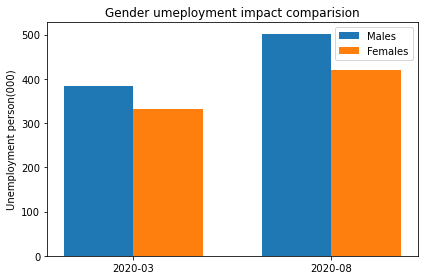

In [107]:


labels = ['2020-03', '2020-08'] 
men_means = [383.157532, 502.386167]
women_means = [332.81765,419.688902]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Males')
rects2 = ax.bar(x + width/2, women_means, width, label='Females')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Unemployment person(000)")
ax.set_title('Gender umeployment impact comparision')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()


In [ ]:
female_count_lowest

female_count_highest